Homework 4

In this homework, we will use the cancer dataset. (Note: You can use the built-in function from ML libraries for gradient descent, training, and validation.) Also, sample code for accessing and cleaning up the dataset provided in Canvas. For the evaluation of this homework across all problems, use 80%, 20% split. We will also use US Housing dataset with  80% and 20% split between training and evaluation (test) sets.

Problem 1:

Use the cancer dataset to build an SVM classifier to classify the type of cancer (Malignant vs. benign). Use the PCA feature extraction for your training. Perform N number of independent training (N=1, …, K).

1. Identify the optimum number of K, principal components that achieve the highest classification accuracy.
2. Plot your classification accuracy, precision, and recall over a different number of Ks.
3. Explore different kernel tricks to capture non-linearities within your data. Plot the results and compare the accuracies for different kernels.
4. Compare your results against the logistic regression that you have done in homework 3.

# Problem 1

1

Import Data

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from google.colab import drive

drive.mount('/content/drive')

file_path = '/content/drive/My Drive/IntroML/content/cancer.csv'
cancer_dataset = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
print(cancer_dataset.head())
print("\nColumn names:", cancer_dataset.columns)
print("\nShape of the dataframe:", cancer_dataset.shape)
if 'Unnamed: 32' in cancer_dataset.columns:
    cancer_dataset = cancer_dataset.drop('Unnamed: 32', axis=1)


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [51]:
# Splitting the data into X (features) and y (target)
X = cancer_dataset.drop(columns=['diagnosis'])
y = cancer_dataset['diagnosis'].map({'M': 1, 'B': 0})  # Convert M to 1 and B to 0

split data

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize variables to store the optimum number of components and the corresponding accuracy
optimum_num_components = 0
highest_accuracy = 0

# Loop through different values of n_components
for n_components in range(1, X_train_scaled.shape[1]+1):
    # Apply PCA
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Train SVM classifier
    clf = SVC(kernel='linear', random_state=42)
    clf.fit(X_train_pca, y_train)

    # Make predictions and evaluate the model
    y_pred = clf.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)

    # Update the optimum number of components if necessary
    if accuracy > highest_accuracy:
        highest_accuracy = accuracy
        optimum_num_components = n_components

print("Optimum number of principal components:", optimum_num_components)
print("Highest classification accuracy:", highest_accuracy)

Optimum number of principal components: 2
Highest classification accuracy: 0.9912280701754386


2. Plot your classification accuracy, precision, and recall over a different number of Ks.

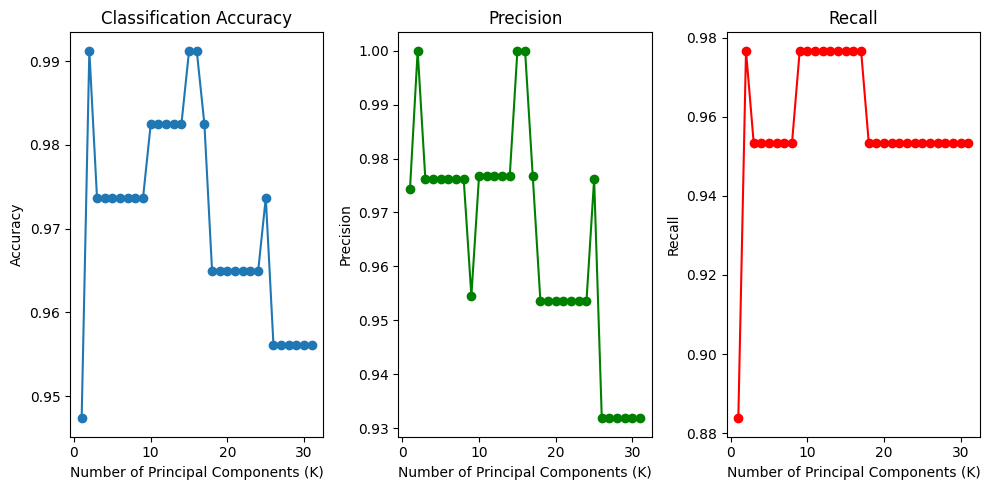

In [54]:
# Initialize lists to store metrics for each value of K
ks = list(range(1, X_train_scaled.shape[1] + 1))
accuracies = []
precisions = []
recalls = []

# Loop through different values of n_components
for n_components in ks:
    # Apply PCA
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Train SVM classifier
    clf = SVC(kernel='linear', random_state=42)
    clf.fit(X_train_pca, y_train)

    # Make predictions and evaluate the model
    y_pred = clf.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    # Store the metrics
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)

# Create the plots
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.plot(ks, accuracies, marker='o')
plt.title('Classification Accuracy')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Accuracy')

plt.subplot(1, 3, 2)
plt.plot(ks, precisions, marker='o', color='green')
plt.title('Precision')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Precision')

plt.subplot(1, 3, 3)
plt.plot(ks, recalls, marker='o', color='red')
plt.title('Recall')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Recall')

plt.tight_layout()
plt.show()

3. Explore different kernel tricks to capture non-linearities within your data. Plot the results and compare the accuracies for different kernels.

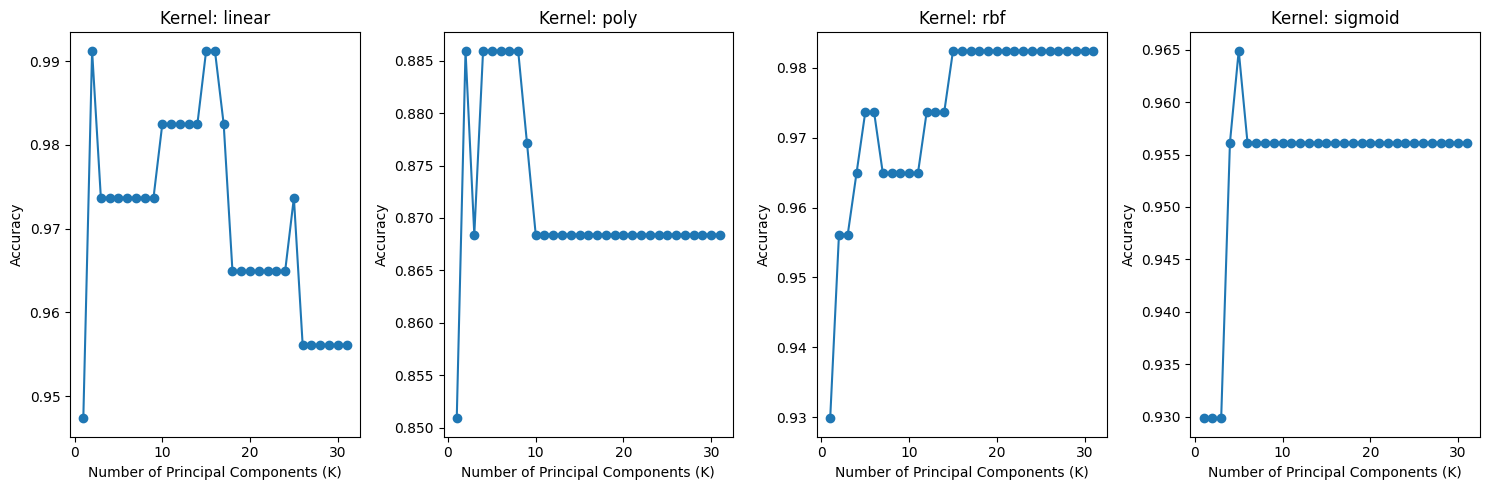

In [55]:
# Define the kernels to be used
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Initialize the plot
plt.figure(figsize=(15, 5))

# Loop through the kernels
for i, kernel in enumerate(kernels, 1):
    # Initialize lists to store metrics for each value of K
    ks = list(range(1, X_train_scaled.shape[1] + 1))
    accuracies = []

    # Loop through different values of n_components
    for n_components in ks:
        # Apply PCA
        pca = PCA(n_components=n_components)
        X_train_pca = pca.fit_transform(X_train_scaled)
        X_test_pca = pca.transform(X_test_scaled)

        # Train SVM classifier
        clf = SVC(kernel=kernel, random_state=42)
        clf.fit(X_train_pca, y_train)

        # Make predictions and evaluate the model
        y_pred = clf.predict(X_test_pca)
        accuracy = accuracy_score(y_test, y_pred)

        # Store the metrics
        accuracies.append(accuracy)

    # Create the plots
    plt.subplot(1, 4, i)
    plt.plot(ks, accuracies, marker='o')
    plt.title(f'Kernel: {kernel}')
    plt.xlabel('Number of Principal Components (K)')
    plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

4. compare

# Problem 2

Develop a SVR regression model that predicts housing price based on the following input variables:

Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea

1. Plot your regression model for SVR similar to the sample code provided on Canvas.

Load the Data

In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score


from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [170]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

file_path = '/content/drive/My Drive/IntroML/content/Housing.csv'
df = pd.read_csv(file_path)

# Convert categorical variables to numerical
categorical_vars = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[categorical_vars] = df[categorical_vars].apply(lambda x: x.map({'yes': 1, 'no': 0}))

# Convert other categorical variables to numerical (One-hot encoding)
df = pd.get_dummies(df, drop_first=True)

# Prepare input and target variables
X = df.drop('price', axis=1)
y = df['price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Standard Scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




1. Plot your regression model for SVR similar to the sample code provided on Canvas.

Mean Absolute Error: 1763890.296258186
R-Squared: -0.10156646889460341


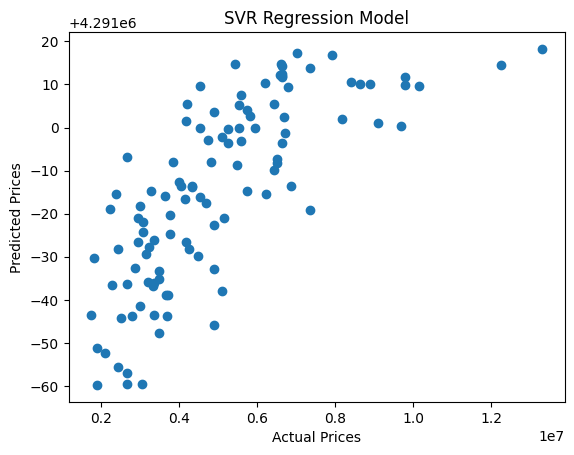

In [171]:

# Create and train the SVR model
svr = SVR()
svr.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svr.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Absolute Error:', mae)
print('R-Squared:', r2)

# Plot the results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('SVR Regression Model')
plt.show()

3. Use the PCA feature extraction for your training. Perform N number of independent training (N=1, …, K). Identify the optimum number of K, principal components that achieve the highest regression accuracy.

In [172]:
mae_scores = []
r2_scores = []
components_range = range(1, X_train_scaled.shape[1] + 1)

for n_components in components_range:
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    svr = SVR()
    svr.fit(X_train_pca, y_train)

    y_pred = svr.predict(X_test_pca)

    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mae_scores.append(mae)
    r2_scores.append(r2)

    print(f'Components: {n_components}, Mean Absolute Error: {mae}, R-Squared: {r2}')


Components: 1, Mean Absolute Error: 1763851.1413267788, R-Squared: -0.10154280852535047
Components: 2, Mean Absolute Error: 1763869.7841866848, R-Squared: -0.10155424469216356
Components: 3, Mean Absolute Error: 1763877.3751826978, R-Squared: -0.10155944869808686
Components: 4, Mean Absolute Error: 1763881.4442189087, R-Squared: -0.10156039870455724
Components: 5, Mean Absolute Error: 1763882.431988821, R-Squared: -0.10156115318924153
Components: 6, Mean Absolute Error: 1763884.219259547, R-Squared: -0.101562285942711
Components: 7, Mean Absolute Error: 1763885.6702506803, R-Squared: -0.10156365058155714
Components: 8, Mean Absolute Error: 1763886.6652435516, R-Squared: -0.10156416303461757
Components: 9, Mean Absolute Error: 1763887.5613346915, R-Squared: -0.10156461694009788
Components: 10, Mean Absolute Error: 1763888.4187760288, R-Squared: -0.10156498237484657
Components: 11, Mean Absolute Error: 1763889.0933063466, R-Squared: -0.10156547460160548
Components: 12, Mean Absolute Erro

In [173]:
optimum_components = np.argmax(r2_scores) + 1
print('Optimum number of components:', optimum_components)


Optimum number of components: 1


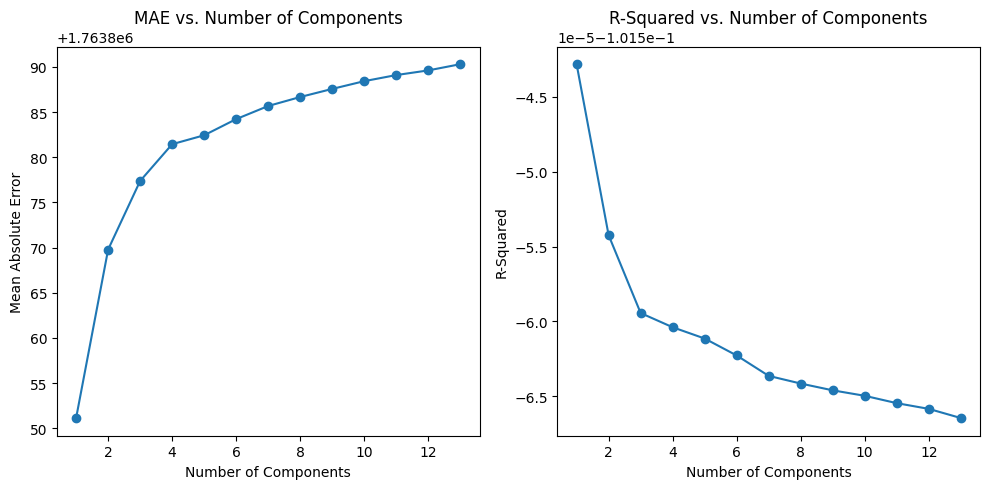

In [174]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(components_range, mae_scores, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Mean Absolute Error')
plt.title('MAE vs. Number of Components')

plt.subplot(1, 2, 2)
plt.plot(components_range, r2_scores, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('R-Squared')
plt.title('R-Squared vs. Number of Components')

plt.tight_layout()
plt.show()


In [175]:
# Define the range for number of principal components
n_components = list(range(1, X_train_scaled.shape[1]+1))
best_r2_score = -np.inf
best_n_components = None
best_model = None

# Perform PCA and train SVR for different numbers of principal components
for n in n_components:
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    svr = SVR()
    svr.fit(X_train_pca, y_train)

    y_pred = svr.predict(X_test_pca)
    r2 = r2_score(y_test, y_pred)
    print('Number of Principal Components:', n)
    print('R-Squared:', r2)
    print('---')

    if r2 > best_r2_score:
        best_r2_score = r2
        best_n_components = n
        best_model = svr

# Print the optimum number of principal components
print('Optimum Number of Principal Components:', best_n_components)
print('Best R-Squared:', best_r2_score)

# Optionally, you can save the best model
# joblib.dump(best_model, 'best_svr_model.pkl')

Number of Principal Components: 1
R-Squared: -0.10154280852535047
---
Number of Principal Components: 2
R-Squared: -0.10155424469216356
---
Number of Principal Components: 3
R-Squared: -0.10155944869808686
---
Number of Principal Components: 4
R-Squared: -0.10156039870455724
---
Number of Principal Components: 5
R-Squared: -0.10156115318924153
---
Number of Principal Components: 6
R-Squared: -0.101562285942711
---
Number of Principal Components: 7
R-Squared: -0.10156365058155714
---
Number of Principal Components: 8
R-Squared: -0.10156416303461757
---
Number of Principal Components: 9
R-Squared: -0.10156461694009788
---
Number of Principal Components: 10
R-Squared: -0.10156498237484657
---
Number of Principal Components: 11
R-Squared: -0.10156547460160548
---
Number of Principal Components: 12
R-Squared: -0.10156585603427182
---
Number of Principal Components: 13
R-Squared: -0.10156646889460341
---
Optimum Number of Principal Components: 1
Best R-Squared: -0.10154280852535047


In [176]:
# List of kernels to explore
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
kernel_scores = []

for kernel in kernels:
    svr = SVR(kernel=kernel)
    svr.fit(X_train_scaled, y_train)

    y_pred = svr.predict(X_test_scaled)

    r2 = r2_score(y_test, y_pred)
    kernel_scores.append(r2)

    print(f'Kernel: {kernel}, R-Squared: {r2}')


Kernel: linear, R-Squared: -0.10111699503729499
Kernel: poly, R-Squared: -0.10155919583082595
Kernel: rbf, R-Squared: -0.10156646889460341
Kernel: sigmoid, R-Squared: -0.10154502389176989


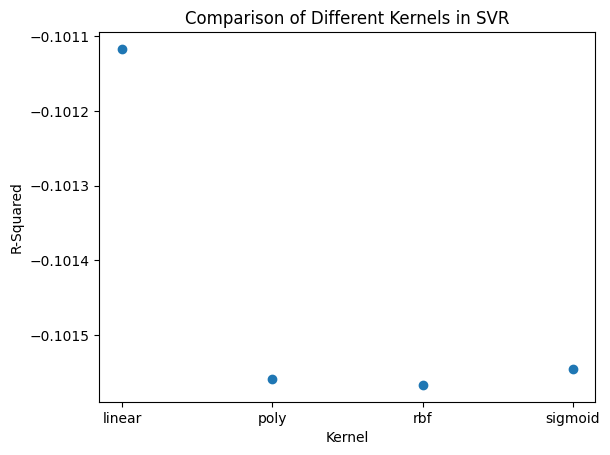

In [180]:
plt.scatter(kernels, kernel_scores)
plt.xlabel('Kernel')
plt.ylabel('R-Squared')
plt.title('Comparison of Different Kernels in SVR')
plt.show()



In [181]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


Kernel: linear, R-Squared: -0.10112427198321616
Kernel: poly, R-Squared: -0.10122414437706095
Kernel: rbf, R-Squared: -0.10155424469216356
Kernel: sigmoid, R-Squared: -0.10150783743045877


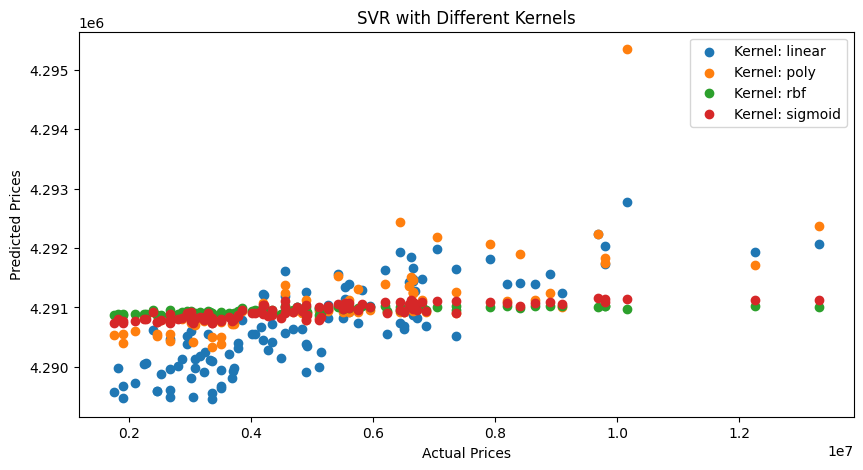

In [182]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
scores = []
predictions = {}

for kernel in kernels:
    svr = SVR(kernel=kernel)
    svr.fit(X_train_pca, y_train)
    y_pred = svr.predict(X_test_pca)
    r2 = r2_score(y_test, y_pred)
    scores.append(r2)
    predictions[kernel] = y_pred
    print(f'Kernel: {kernel}, R-Squared: {r2}')

# Plot the results
plt.figure(figsize=(10, 5))
for kernel in kernels:
    plt.scatter(y_test, predictions[kernel], label=f'Kernel: {kernel}')

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('SVR with Different Kernels')
plt.legend()
plt.show()
